In [167]:
import pandas as pd

In [168]:
original = pd.read_csv('../00_data/noshowappointments-kagglev2-may-2016.csv')
original.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [173]:
## Changes to the original dataset

# Drop AppointmentDay since it is redundant
modified = original.drop('AppointmentDay', axis=1)

# Switch to datetime
modified['ScheduledDay'] = pd.to_datetime(modified['ScheduledDay'])

# Replace No-show with a boolean
modified['no_show'] = modified['No-show'] == 'Yes'
modified.drop('No-show', axis=1, inplace=True)

# Create a health index
modified['health_index'] = modified['Hipertension'] + modified['Diabetes'] + modified['Alcoholism']

# Replace negative ages with zero
s = modified['Age'].copy()
s[s < 0] = 0
modified['Age'] = s

<AxesSubplot:>

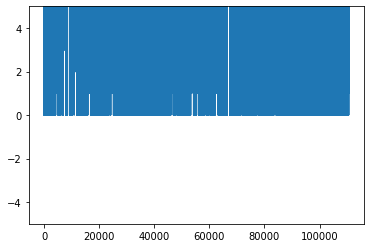

In [174]:
modified['Age'].plot(ylim=(-5, 5))

In [175]:
modified.to_csv('../00_data/data_rev00.csv', index=False)